In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [9]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\timon\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [3]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [11]:
train_df.keyword.value_counts()
#replace %20 with a space?

fatalities               45
deluge                   42
armageddon               42
sinking                  41
damage                   41
                         ..
forest%20fire            19
epicentre                12
threat                   11
inundation               10
radiation%20emergency     9
Name: keyword, Length: 221, dtype: int64

In [12]:
train_df.location.value_counts()
#replace special letters?

USA                    104
New York                71
United States           50
London                  45
Canada                  29
                      ... 
MontrÌ©al, QuÌ©bec       1
Montreal                 1
ÌÏT: 6.4682,3.18287      1
Live4Heed??              1
Lincoln                  1
Name: location, Length: 3341, dtype: int64

In [15]:
train_df.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [ ]:
#column keyword & location might get deleted since it is missleading...

In [19]:
train_df.describe()

,id,target
count,7613.000000,7613.00000
mean,5441.934848,0.42966
std,3137.116090,0.49506
min,1.000000,0.00000
25%,2734.000000,0.00000
50%,5408.000000,0.00000
75%,8146.000000,1.00000
max,10873.000000,1.00000


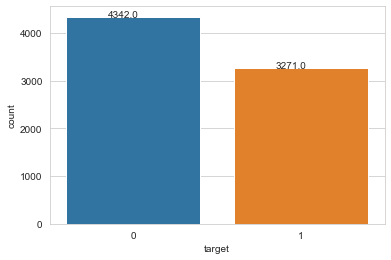

In [18]:
sns.set_style('whitegrid')

ax = sns.countplot(x="target", data=train_df)

for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.show()

#dataset seems not to be strongly imbalanced target 1 vs 0...

In [27]:
train_df["text_length"] = train_df["text"].str.len()

train_df.head()

,id,keyword,location,text,target,text_length
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88


In [61]:
train_df.text_length.describe()

min: 7
max: 157


count    7613.000000
mean      101.037436
std        33.781325
min         7.000000
25%        78.000000
50%       107.000000
75%       133.000000
max       157.000000
Name: text_length, dtype: float64

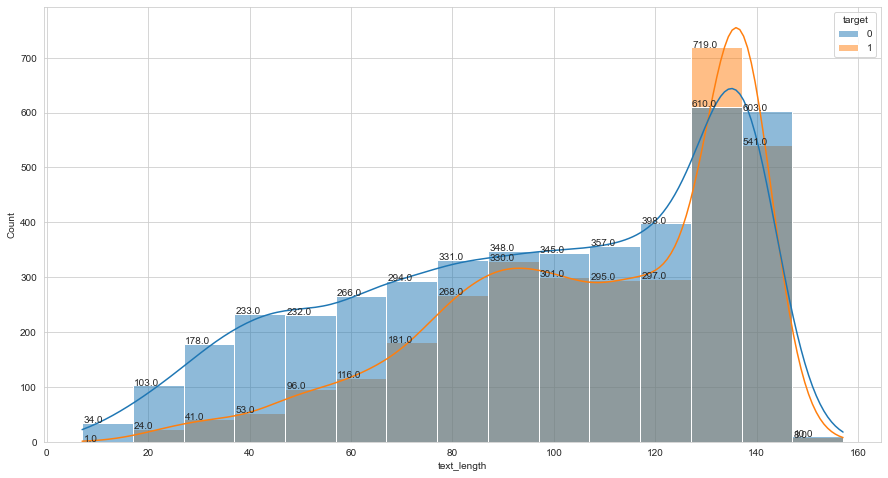

In [60]:
plt.figure(figsize=(15,8))

ax2 = sns.histplot(data = train_df, x = 'text_length', hue = 'target', bins = 15, kde = 'True')

for p in ax2.patches:
   ax2.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.show()

#harmless text are more frequent on lower text length (0-70)
#90 is almost even to none desaster text
#130 text lenght is more likely of a desaster text than a normal text...

#no clear difference; column not usefull...

In [119]:
import re
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
lemmatizer=WordNetLemmatizer()
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\timon\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\timon\AppData\Roaming\nltk_data...


True

In [159]:
#text preprocessing -> tokenizing + lemmatizing
def text_preprocessing(text):
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    nopunc = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

    return [lemmatizer.lemmatize(word).lower() for word in nopunc]

In [160]:
train_df.text.apply(text_preprocessing)

0       [deeds, reason, earthquake, may, allah, forgiv...
1           [forest, fire, near, la, ronge, sask, canada]
2       [resident, asked, shelter, place, notified, of...
3       [13000, people, receive, wildfire, evacuation,...
4       [got, sent, photo, ruby, alaska, smoke, wildfi...
                              ...                        
7608    [two, giant, crane, holding, bridge, collapse,...
7609    [ariaahrary, thetawniest, control, wild, fire,...
7610    [m194, 0104, utc5km, volcano, hawaii, httptcoz...
7611    [police, investigating, ebike, collided, car, ...
7612    [latest, homes, razed, northern, california, w...
Name: text, Length: 7613, dtype: object

In [143]:
#Vectorizing all words from text column
from sklearn.feature_extraction.text import CountVectorizer

In [161]:
bow_transformer = CountVectorizer(analyzer=text_preprocessing).fit(train_df.text)

In [168]:
#testing
print(len(bow_transformer.vocabulary_))
message = train_df.text.iloc[1]
print(message)
bow = bow_transformer.transform([message])
print(bow)
print(bow_transformer.get_feature_names()[2906])

21992
Forest fire near La Ronge Sask. Canada
  (0, 2906)	1
  (0, 6031)	1
  (0, 6218)	1
  (0, 13455)	1
  (0, 15163)	1
  (0, 17682)	1
  (0, 17963)	1
canada


In [169]:
text_bow = bow_transformer.transform(train_df.text)

In [179]:
#testing
print("shape")
print(text_bow.shape)
print("how often appearance of not null")
print(text_bow.nnz)

print("how many null values do we have in comparison to null values")
sparsity = (100.0 * text_bow.nnz / (text_bow.shape[0] * text_bow.shape[1]))
print(round(sparsity, 2))

shape
(7613, 21992)
how often appearance of not null
74570
how many null values do we have in comparison to null values
0.04


In [181]:
#get relevance of words in text column based on frequency
from sklearn.feature_extraction.text import TfidfTransformer

In [182]:
tfidf_transformer = TfidfTransformer().fit(text_bow)

In [185]:
text_tfidf = tfidf_transformer.transform(text_bow)

In [186]:
text_tfidf.shape

(7613, 21992)

In [187]:
#Machine Learning with naive_bayes train the model
from sklearn.naive_bayes import MultinomialNB

In [188]:
desaster_model = MultinomialNB().fit(text_tfidf, train_df['target'])

In [195]:
predictions = desaster_model.predict(text_tfidf)

In [196]:
from sklearn.metrics import classification_report

In [197]:
print(classification_report(train_df.target, predictions))

#from here on enhancing the ML-Model would be necessary to get a higher accuracy score! --> https://www.nltk.org/book/

              precision    recall  f1-score   support

           0       0.87      0.98      0.92      4342
           1       0.96      0.80      0.88      3271

    accuracy                           0.90      7613
   macro avg       0.92      0.89      0.90      7613
weighted avg       0.91      0.90      0.90      7613



In [200]:
#set up a pipeline to simplify the data preprocessing steps
from sklearn.pipeline import Pipeline

In [204]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_preprocessing)),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB())
])

In [207]:
#test the model on extra train data
pipeline.fit(train_df.text, train_df.target)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_preprocessing at 0x000002A4BAFEAC10>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [209]:
#predict disasters on never seen before data
predictions_final = pipeline.predict(test_df.text)

In [221]:
#Kaggle competition
submission_data = test_df.copy()

submission_data.drop(['keyword', 'location','text'], axis = 1, inplace = True)

submission_data["target"] = predictions_final

submission_data.to_csv('submission_data.csv', index = False)